# Fuel Efficiency Predictor

This model does an exploratory analysis of the auto-mpg dataset, and uses it to predict the fuel efficiency of different cars based on several input parameters.

In [320]:
# imports and boilerplate
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import sklearn
from sklearn import preprocessing

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [321]:
# file path and reading in csv into dataframe
dataset_path = "sample_data/auto-mpg.csv"

In [322]:
# creating dataframe from csv
df = pd.read_csv(dataset_path)
df['carName'] = df['carName'].str.replace('((\\t)|(\"))', '')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [323]:
# quick summary of data statistics
df.describe()

,mpg,cylinders,displacement,weight,acceleration,modelYear,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [324]:
# getting rid of missing data
df = df.dropna()
df = df[df.horsepower != '?']

In [325]:
# I noticed that the origin column corresponded to the location that car was made, so I 
# moved it to its own discrete column, since this data is categorical
df['countryCode'] = df.origin.replace([1, 2, 3], ['USA', 'Europe', 'Japan'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,origin,carName,countryCode
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,USA


Skewness: 0.457092
Kurtosis: -0.515993


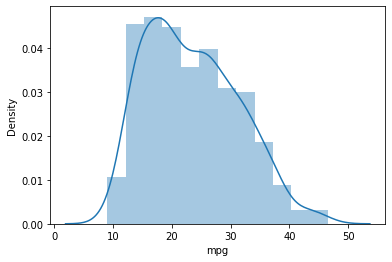

In [326]:
# visualizations of mpg
sns.distplot(df['mpg'])
print("Skewness: %f" % df['mpg'].skew())
print("Kurtosis: %f" % df['mpg'].kurt())

Skewness: 0.508109
Kurtosis: -1.398199


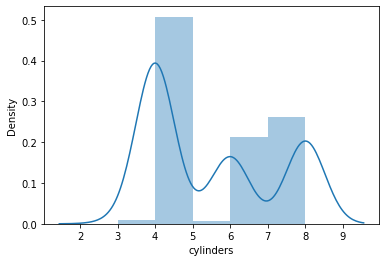

In [327]:
# visualizations of cylinders
sns.distplot(df['cylinders'])
print("Skewness: %f" % df['cylinders'].skew())
print("Kurtosis: %f" % df['cylinders'].kurt())

Skewness: 0.701669
Kurtosis: -0.778317


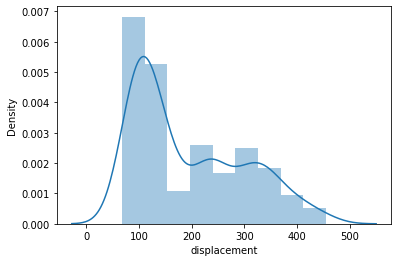

In [328]:
# visualizations of displacement
sns.distplot(df['displacement'])
print("Skewness: %f" % df['displacement'].skew())
print("Kurtosis: %f" % df['displacement'].kurt())

Skewness: 1.087326
Kurtosis: 0.696947


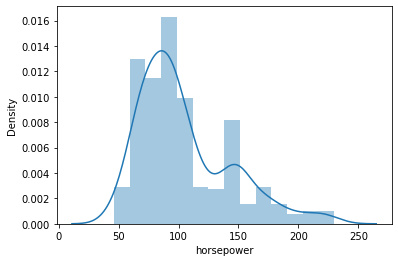

In [329]:
# visualizations of horsepower
sns.distplot(df['horsepower'])
print("Skewness: %f" % df['horsepower'].skew())
print("Kurtosis: %f" % df['horsepower'].kurt())

In [330]:
# i wanted to explore some correlation relationships between different features, so i decided to normalize the data first
# using minimax normalization
column_names_to_normalize = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'modelYear']
x = df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_scale = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df.index)
df_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0


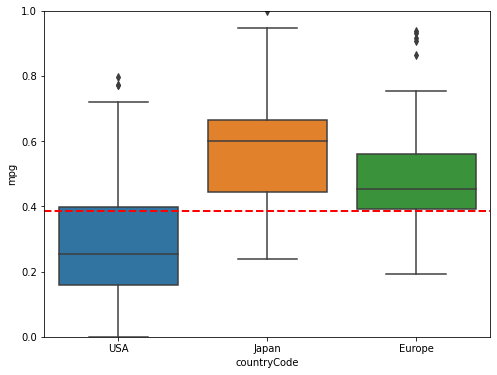

In [331]:
# visualizes the mpg relationships across the three manufacturing regions
# as we can see, cars manufactured in the united states are typically much lower
# than the average mpg

# japanese and european mpg are typically higher than average, indicating differences
# in environmental standards for vehicle manufacturing

data_plt = pd.concat([df_scale['mpg'], df['countryCode']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='countryCode', y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

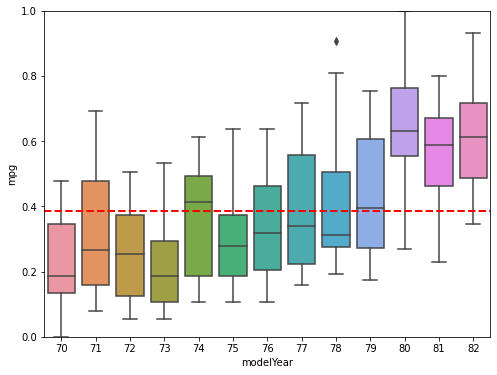

In [332]:
# now, let's look at the trends of fuel efficiency over time
# we can see a clear uptick in fuel efficiency over time
# indicating better technology and rising fuel efficiency standards

data_plt = pd.concat([df_scale['mpg'], df['modelYear']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='modelYear', y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

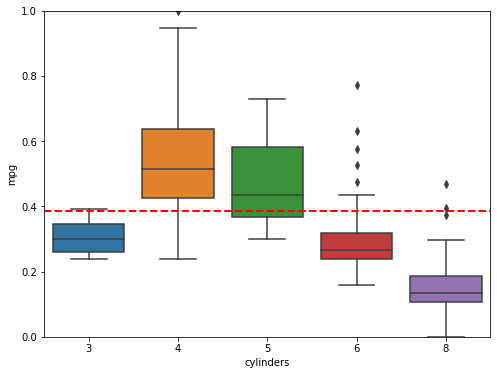

In [333]:
# now, let's try and understand the changes in mpg with respect to the number of cylinders
# that a car has. we can see that optimality is reached closer to 4 cylinders
# with lower numbers decreasing efficiency and higher numbers experiencing decreasing efficiency
data_plt = pd.concat([df_scale['mpg'], df['cylinders']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='cylinders', y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

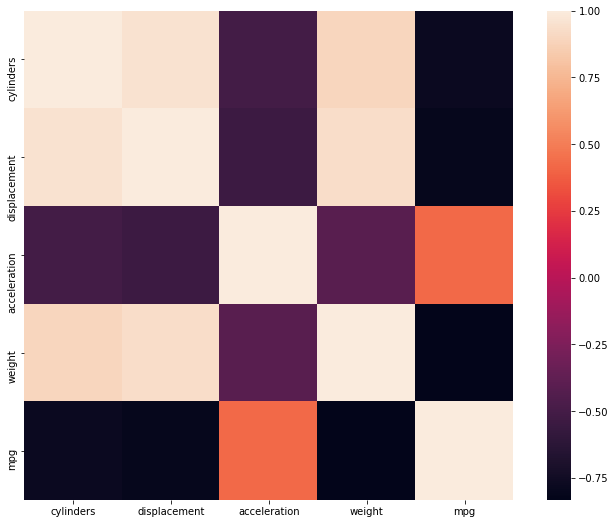

In [334]:
# let's now explore the correlations between different variables
# this might give us a sense of what features are interrelated within are model
# and whether certain features are likely to influence each other when it comes to mpg
# this mainly focuses on quantitative features

factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = df[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,USA,Europe,Japan
146,28.0,4,90.0,75,2125,14.5,74,1.0,0.0,0.0
282,22.3,4,140.0,88,2890,17.3,79,1.0,0.0,0.0
69,12.0,8,350.0,160,4456,13.5,72,1.0,0.0,0.0
378,38.0,4,105.0,63,2125,14.7,82,1.0,0.0,0.0
331,33.8,4,97.0,67,2145,18.0,80,0.0,0.0,1.0


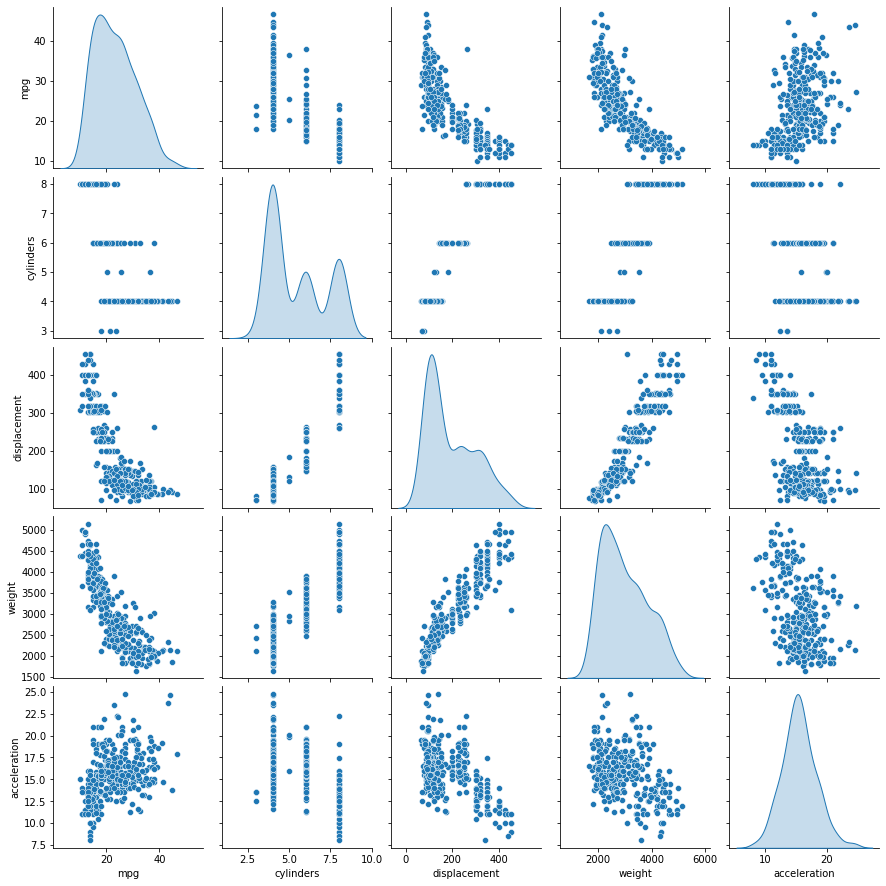

In [366]:
# Creating training and testing datasets for the creation of our model
# We want to use these to "predict" the fuel efficiency of a given car
dataset = pd.read_csv(dataset_path)
dataset['carName'] = dataset['carName'].str.replace('((\\t)|(\"))', '')
dataset = dataset.dropna()
dataset = dataset[dataset.horsepower != '?']

# importing in new clean version of the data
origin = dataset.pop('origin')
dataset['USA'] = (origin == 1) * 1.0
dataset['Europe'] = (origin == 2) * 1.0
dataset['Japan'] = (origin == 3) * 1.0
traindf = dataset.sample(frac=0.8,random_state=0)
testdf = dataset.drop(train.index)

# this provides a quick visualization of our training dataset based on 5 key params
sns.pairplot(traindf[["mpg", "cylinders", "displacement", "weight", "acceleration"]], diag_kind="kde")
traindf = traindf.drop(columns=["carName"])
traindf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelYear,USA,Europe,Japan
9,15.0,8,390.0,190,3850,8.5,70,1.0,0.0,0.0
25,10.0,8,360.0,215,4615,14.0,70,1.0,0.0,0.0
28,9.0,8,304.0,193,4732,18.5,70,1.0,0.0,0.0
31,25.0,4,113.0,95,2228,14.0,71,0.0,0.0,1.0
33,19.0,6,232.0,100,2634,13.0,71,1.0,0.0,0.0


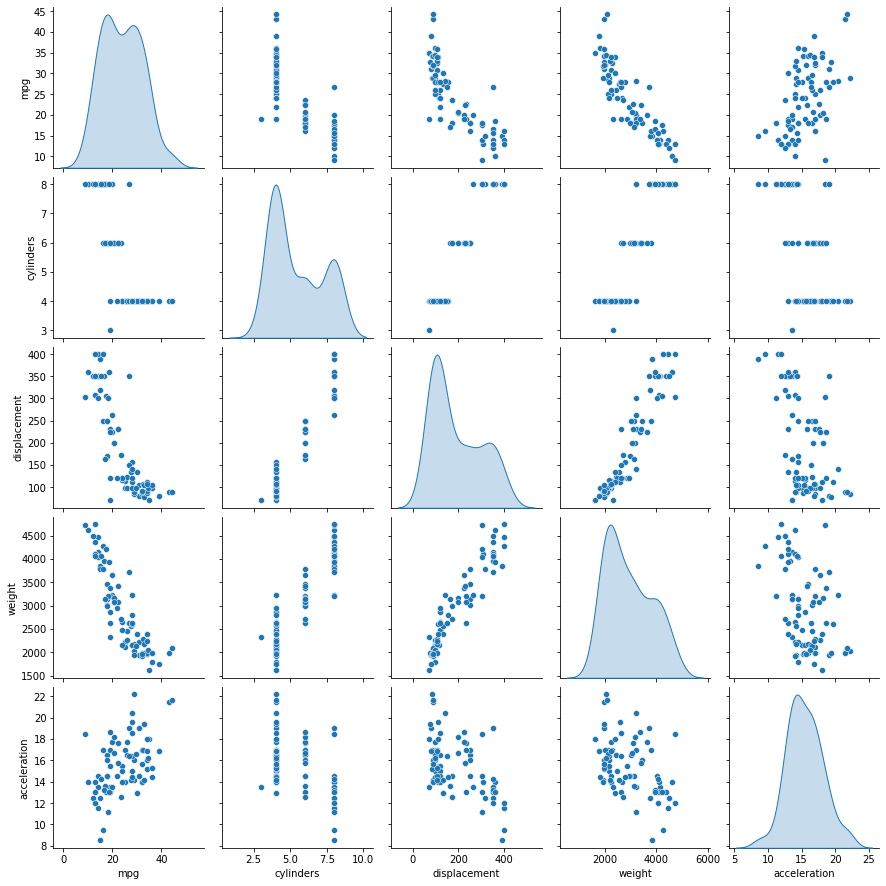

In [367]:
# we want these plots to look similar between training and testing
sns.pairplot(testdf[["mpg", "cylinders", "displacement", "weight", "acceleration"]], diag_kind="kde")
testdf = testdf.drop(columns=["carName"])
testdf.head()

In [368]:
# some useful statistics about out training dataset
train_stats = traindf.describe()
train_stats.pop("mpg")
train_stats = train_stats.transpose()
train_stats


# these are the actual labels for our data, which will be used to determine how 
# we train the data and compare our error to true mpg values
train_labels = traindf.pop('mpg')
test_labels = testdf.pop('mpg')

In [372]:
# this essentially normalizes the data and puts each data point on the same scale
# between 0 and 1, essentially ensuring that we are training our data on the same scale

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(traindf)
normed_test_data = norm(testdf)

# the data was having issues normalizing horsepower, so for the purposes of analysis, i dropped this column
# however, in future iterations, it would definitely make sense to include this feature
normed_train_data = normed_train_data.drop(columns=['horsepower'])
normed_train_data

,Europe,Japan,USA,acceleration,cylinders,displacement,modelYear,weight
146,-0.465148,-0.495225,0.774676,-0.379759,-0.869348,-1.009459,-0.516397,-1.025303
282,-0.465148,-0.495225,0.774676,0.624102,-0.869348,-0.530218,0.843910,-0.118796
69,-0.465148,-0.495225,0.774676,-0.738281,1.483887,1.482595,-1.060519,1.736877
378,-0.465148,-0.495225,0.774676,-0.308055,-0.869348,-0.865687,1.660094,-1.025303
331,-0.465148,2.012852,-1.286751,0.875068,-0.869348,-0.942365,1.115971,-1.001603
...,...,...,...,...,...,...,...,...
281,-0.465148,-0.495225,0.774676,0.946772,0.307270,0.044872,0.843910,-0.000298
229,-0.465148,-0.495225,0.774676,-1.598734,1.483887,1.961837,0.299787,1.457223
150,-0.465148,2.012852,-1.286751,-0.021237,-0.869348,-0.836932,-0.516397,-0.710099
145,-0.465148,2.012852,-1.286751,1.233589,-0.869348,-1.076553,-0.516397,-1.169870


In [384]:
# this creates a multi-layer neural network based on the training dataset which we have cleaned and provided
# since we are ignoring the horsepower column, we had to lower the number of keys that we are considering
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(traindf.keys()) - 1]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

model = build_model()

In [376]:
# this highlights the model training process, and prints a dot after every epoch (training period)

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [383]:
# this is the training history of the model, and shows its progression towards accurate predictions
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
64,6.831895,1.837125,6.831895,9.453544,2.276196,9.453544,64
65,6.930665,1.810498,6.930665,8.919894,2.222733,8.919894,65
66,6.714414,1.799366,6.714414,8.955868,2.261746,8.955868,66
67,6.829274,1.749298,6.829274,8.973021,2.226066,8.973021,67
68,6.667157,1.794449,6.667157,9.026224,2.207404,9.026224,68



.....................................................................

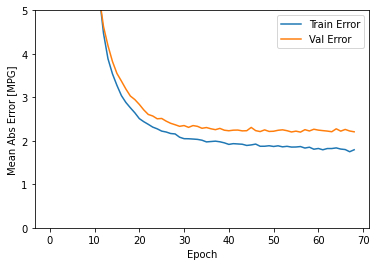

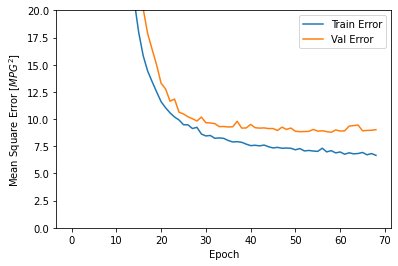

In [381]:
model = build_model()

# our model experienced a dropoff in performance earlier on, since the rate of improvement was not really improving after a certain point
# so we use this parameter stop early
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

Testing set Mean Abs Error:  1.92 MPG


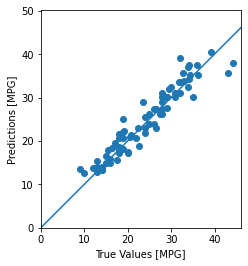

In [382]:
# these are some final statistics about the accuracy of our model
# from this, we were able to predict the miles per gallon of a car accurately based
# on the intaked parameters to within 2 miles per gallon

loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])